In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Understanding Suicide: A Global Study on Economic and Demographic Factors

This study embarks on an in-depth examination of global suicide rates spanning from 1990 to 2022, aiming to uncover patterns and trends across different generations, age groups, and genders. The exploration seeks to elucidate the complex interplay between suicide rates and a variety of determinants, including economic, environmental, societal, and geographic factors, with a special focus on the impact of regional and country-specific contexts.

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ_IEjpnl30P5FxwviMCnyIR1kWeTtd0LORd8QI3D7hGZxwFkgNNoSr7X8JC-OUjqY9KDiqejK0VaXp/pub?output=csv')

In [ ]:
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


## Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [ ]:
total_suicides = df['SuicideCount'].sum()
total_suicides

7514689.0

In [ ]:
df.dtypes

RegionCode                       object
RegionName                       object
CountryCode                      object
CountryName                      object
Year                              int64
Sex                              object
AgeGroup                         object
Generation                       object
SuicideCount                    float64
CauseSpecificDeathPercentage    float64
DeathRatePer100K                float64
Population                      float64
GDP                             float64
GDPPerCapita                    float64
GrossNationalIncome             float64
GNIPerCapita                    float64
InflationRate                   float64
EmploymentPopulationRatio       float64
dtype: object

In [ ]:
df['Generation'].unique()

array(['Generation Alpha', 'Generation Z', 'Millennials', 'Generation X',
       'Baby Boomers', 'Silent Generation', 'Unknown'], dtype=object)

In [ ]:
df['CountryName'].unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bahamas', 'Antigua and Barbuda',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'China, Hong Kong SAR',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Republic of Korea', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Martinique', 'Mauritius',
       'Mayotte', 'Mexico', 'Republic of Moldova', 'Montenegro',
       'Neth

## Descriptive Statistics

In [ ]:
df.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118560.000000,118096.000000,114271.000000,107896.000000,1.126400e+05,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
mean,2005.740047,63.632037,3.873690,12.299791,2.456184e+07,4.883873e+11,17423.508254,4.975887e+11,22147.217069,20.286455,55.750811
std,8.745003,254.095408,7.317820,21.016170,4.531156e+07,1.653651e+12,19332.136111,1.688802e+12,18886.398425,163.099904,8.140994
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.613805e+06,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,2006.000000,4.000000,0.586166,4.452366,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,2013.000000,32.000000,4.355646,15.384615,2.533364e+07,3.010000e+11,25197.265600,3.060000e+11,29530.000000,6.536199,60.415250
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.330000e+13,133711.794400,2.370000e+13,152630.000000,4734.914347,87.518000


## Generation Distribution

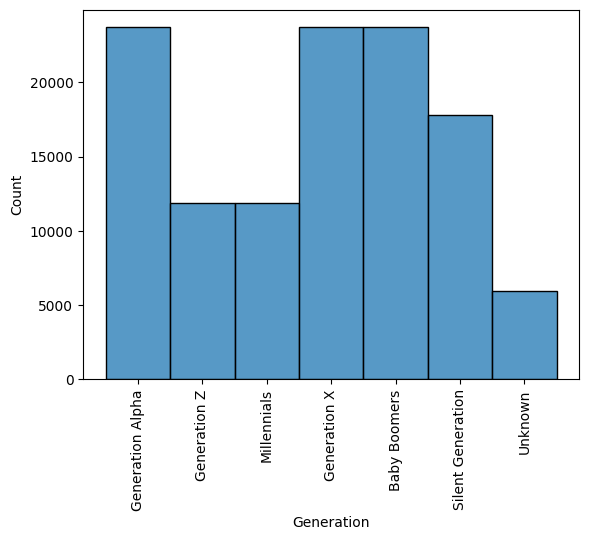

In [ ]:
sns.histplot(df['Generation'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
age_distribution_per_generation = pd.pivot_table(
    data=df,
    index=['AgeGroup'],
    columns=['Generation'],
    values='SuicideCount',
    aggfunc='sum',
    fill_value=0
).reset_index()

In [ ]:
melted_data = age_distribution_per_generation.melt(id_vars=['AgeGroup'], var_name='Generation', value_name='SuicideCount')

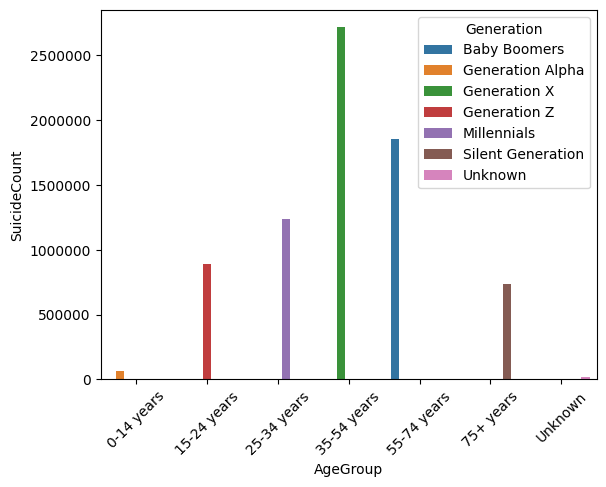

In [ ]:
sns.barplot(data=melted_data, x='AgeGroup', y='SuicideCount', hue='Generation')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

### Correlation

In [ ]:
corr = df.corr()
corr

<ipython-input-81-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
Year,1.000000,-0.016841,0.044024,-0.105230,0.044593,0.091276,0.291745,0.085048,0.383053,-0.149974,0.074165
SuicideCount,-0.016841,1.000000,0.147721,0.266253,0.496234,0.447787,0.072852,0.446931,0.048199,0.028594,0.028569
CauseSpecificDeathPercentage,0.044024,0.147721,1.000000,0.156121,0.009739,0.080064,0.233483,0.081732,0.177727,-0.015882,0.035395
DeathRatePer100K,-0.105230,0.266253,0.156121,1.000000,0.009899,0.023884,0.006279,0.027094,-0.025042,0.048412,-0.070449
Population,0.044593,0.496234,0.009739,0.009899,1.000000,0.772071,0.064127,0.769142,0.033977,0.030810,0.035800
GDP,0.091276,0.447787,0.080064,0.023884,0.772071,1.000000,0.293746,0.999287,0.243429,-0.022707,0.059297
GDPPerCapita,0.291745,0.072852,0.233483,0.006279,0.064127,0.293746,1.000000,0.291388,0.858783,-0.080196,0.293355
GrossNationalIncome,0.085048,0.446931,0.081732,0.027094,0.769142,0.999287,0.291388,1.000000,0.243497,-0.022754,0.059830
GNIPerCapita,0.383053,0.048199,0.177727,-0.025042,0.033977,0.243429,0.858783,0.243497,1.000000,-0.087513,0.375382
InflationRate,-0.149974,0.028594,-0.015882,0.048412,0.030810,-0.022707,-0.080196,-0.022754,-0.087513,1.000000,0.016249


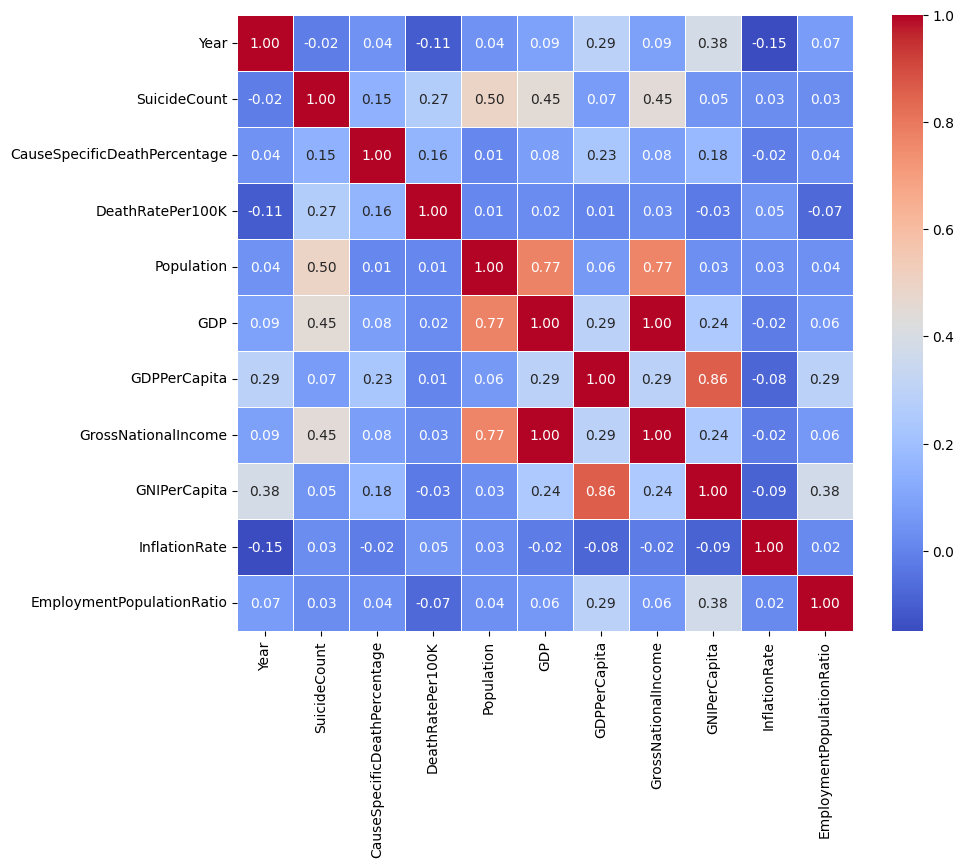

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()

## Missing Values

In [ ]:
df.isnull().sum()

RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64

In [ ]:
df.isnull().sum() / len(df) * 100.0

RegionCode                       0.000000
RegionName                       0.000000
CountryCode                      0.000000
CountryName                      0.000000
Year                             0.000000
Sex                              0.000000
AgeGroup                         0.000000
Generation                       0.000000
SuicideCount                     0.391363
CauseSpecificDeathPercentage     3.617578
DeathRatePer100K                 8.994602
Population                       4.993252
GDP                              6.106613
GDPPerCapita                     6.106613
GrossNationalIncome              8.400810
GNIPerCapita                     9.075574
InflationRate                   12.196356
EmploymentPopulationRatio        9.379217
dtype: float64

## Checking Outliers

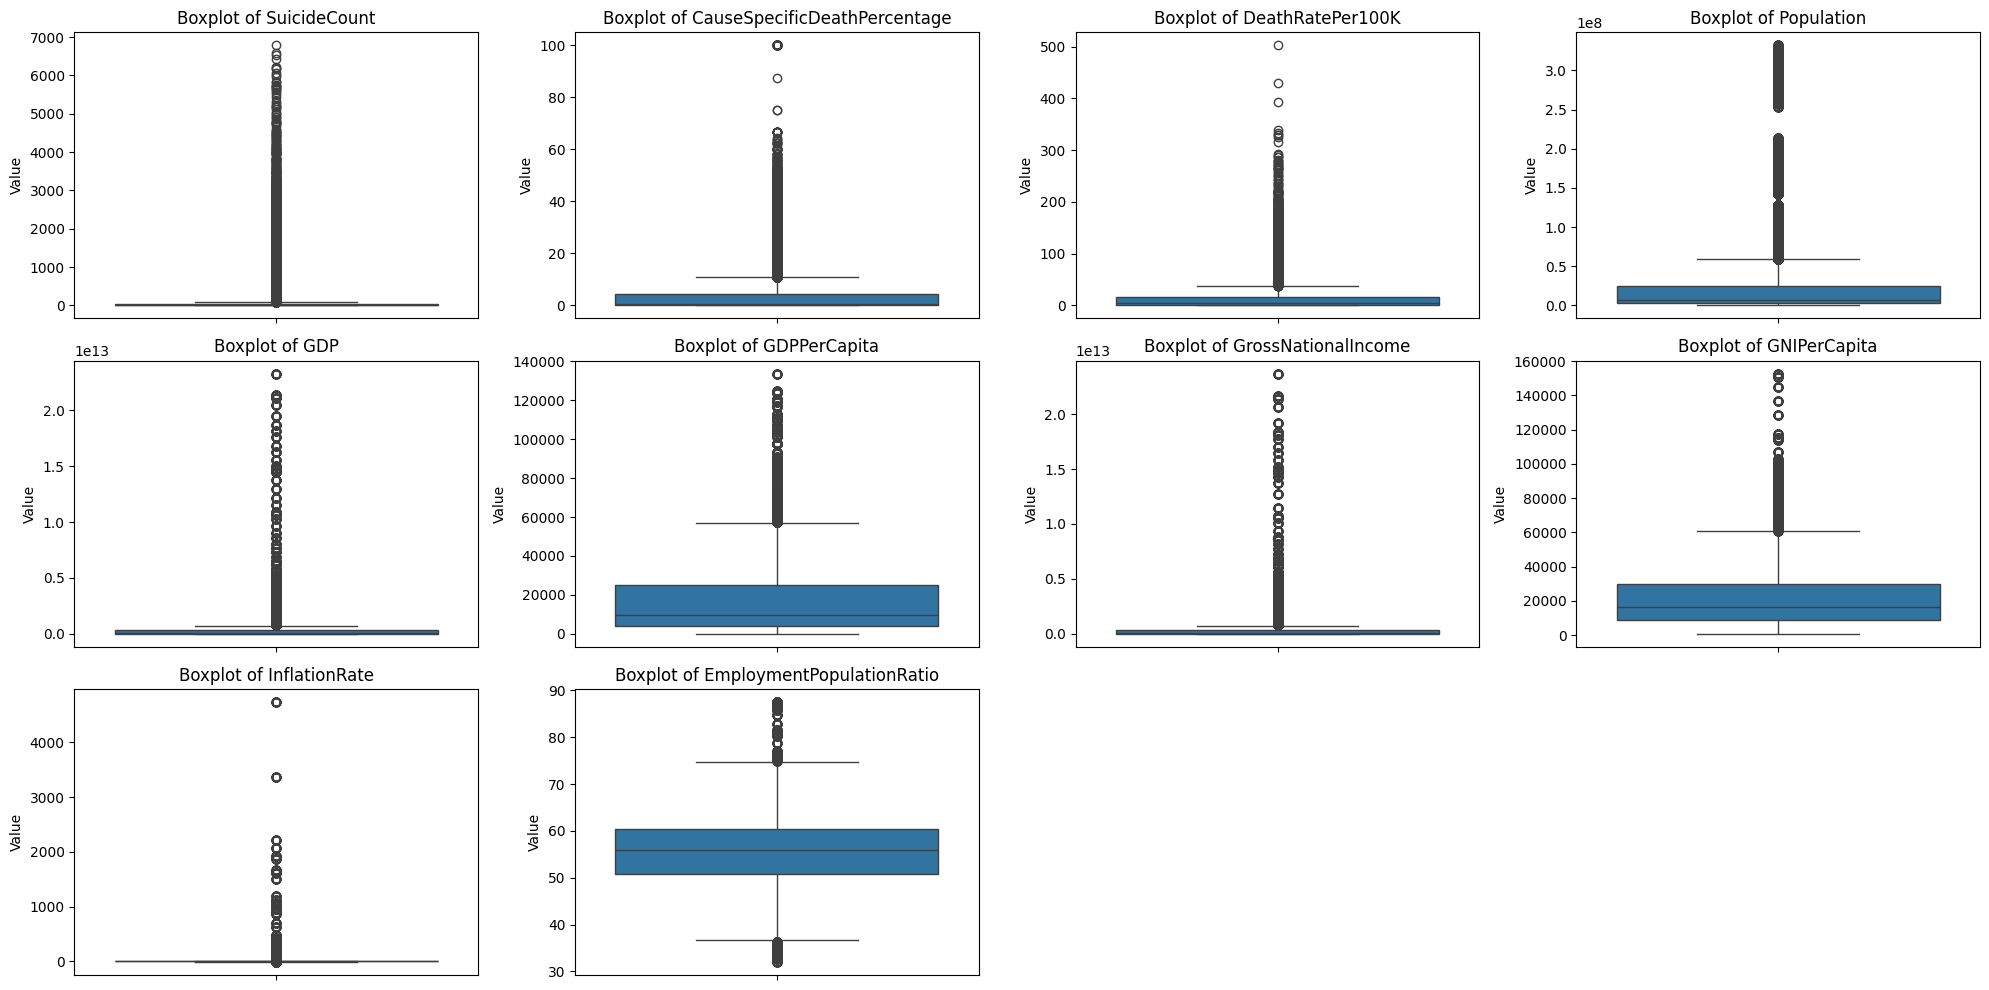

In [ ]:
# List of numerical columns to check for outliers
numerical_columns = ['SuicideCount', 'CauseSpecificDeathPercentage', 'DeathRatePer100K', 'Population',
                     'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
                     'EmploymentPopulationRatio']

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)  # Adjust the grid parameters based on the number of variables
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Value')
    plt.tight_layout()

# Show the plot
plt.show()


<Axes: ylabel='GDPPerCapita'>

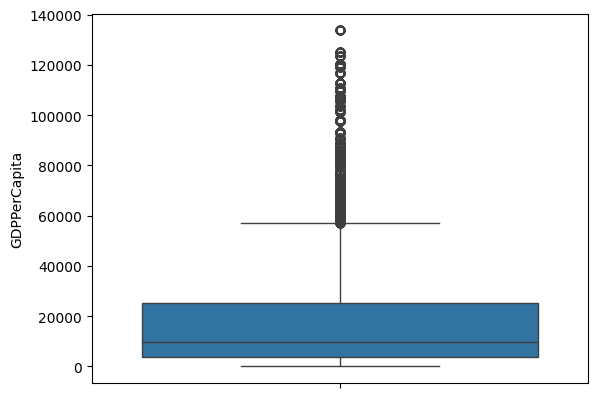

In [ ]:
sns.boxplot(df['GDPPerCapita'])

<Axes: ylabel='EmploymentPopulationRatio'>

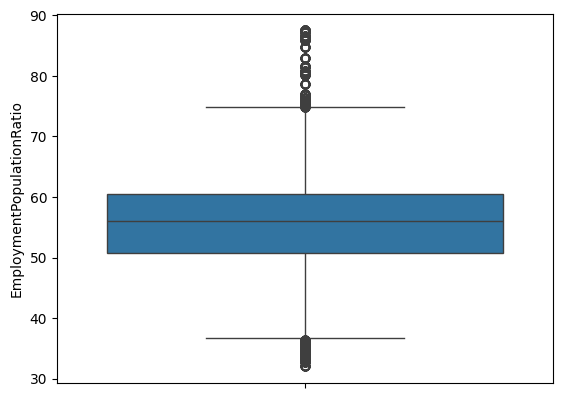

In [ ]:
sns.boxplot(df['EmploymentPopulationRatio'])

## Investigate

### Demographic: Gender Distribution

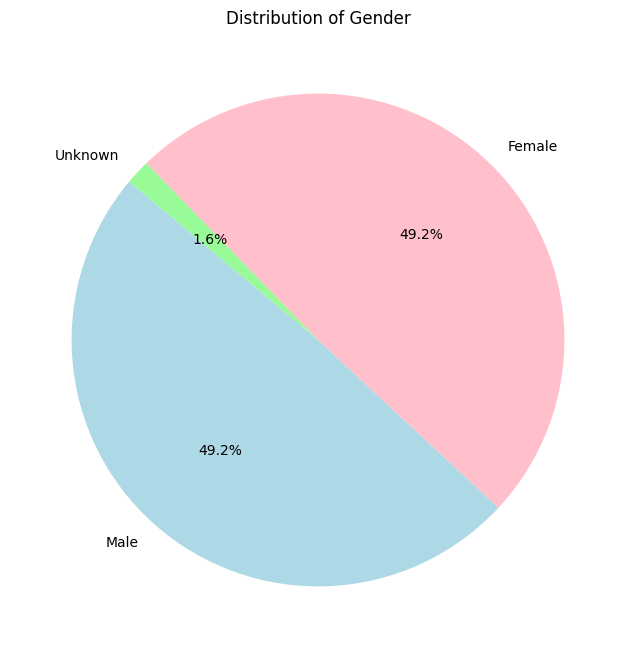

In [ ]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['#add8e6', '#ffc0cb', '#98fb98'])
plt.title('Distribution of Gender')
plt.show()

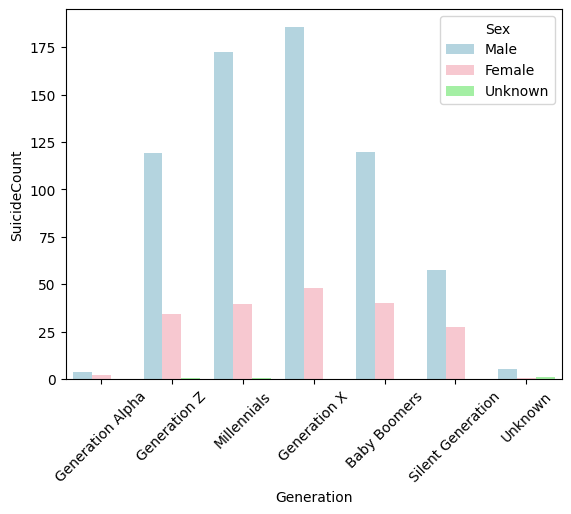

In [ ]:
custom_palette = {'Male': '#add8e6', 'Female': '#ffc0cb', 'Unknown' : '#98fb98'}

sns.barplot(data=df, x='Generation', y='SuicideCount', hue='Sex', palette=custom_palette, errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

Regarding the observation about males having a higher suicide count, this is an observation that is often supported by public health statistics. Men are typically reported to have higher rates of suicide in many regions of the world. This is a complex issue with many contributing factors, including social norms and behaviors, reporting practices, and access to means of suicide, among others.

### Demographic: Generation Distribution

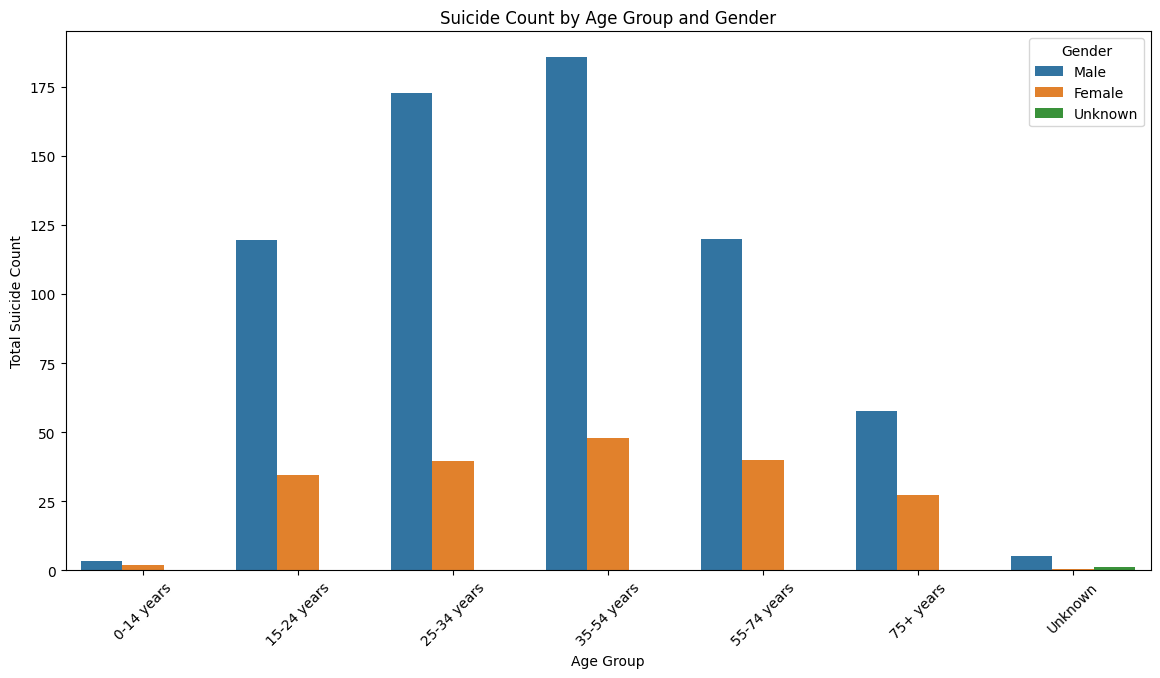

In [ ]:
# Plot suicide count by Age Group and differentiate by Sex
plt.figure(figsize=(14, 7))
sns.barplot(x='AgeGroup', y='SuicideCount', hue='Sex', data=df, errorbar=None)
plt.title('Suicide Count by Age Group and Gender')
plt.ylabel('Total Suicide Count')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

### Suicide Rate by Generation

In [ ]:
# Create datasets
df_Alpha = df[df['Generation'] == 'Generation Alpha']
df_Z = df[df['Generation'] == 'Generation Z']
df_Mill = df[df['Generation'] == 'Millennials']
df_X = df[df['Generation'] == 'Generation X']
df_BB = df[df['Generation'] == 'Baby Boomers']
df_Silent = df[df['Generation'] == 'Silent Generation']

# Groupby - Year
suicide_Alpha = df_Alpha.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Z = df_Z.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Mill = df_Mill.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_X = df_X.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_BB = df_BB.groupby('Year')['SuicideCount'].sum().reset_index()
suicide_Silent = df_Silent.groupby('Year')['SuicideCount'].sum().reset_index()

# Rename columns
suicide_Alpha.rename(columns = {'SuicideCount':'Alpha'}, inplace = True)
suicide_Z.rename(columns = {'SuicideCount':'Z'}, inplace = True)
suicide_Mill.rename(columns = {'SuicideCount':'Mill'}, inplace = True)
suicide_X.rename(columns = {'SuicideCount':'X'}, inplace = True)
suicide_BB.rename(columns = {'SuicideCount':'BB'}, inplace = True)
suicide_Silent.rename(columns = {'SuicideCount':'Silent'}, inplace = True)

# Concat datasets
suicide_generation = pd.concat([suicide_Alpha, suicide_Z, suicide_Mill,
                               suicide_X, suicide_BB, suicide_Silent])

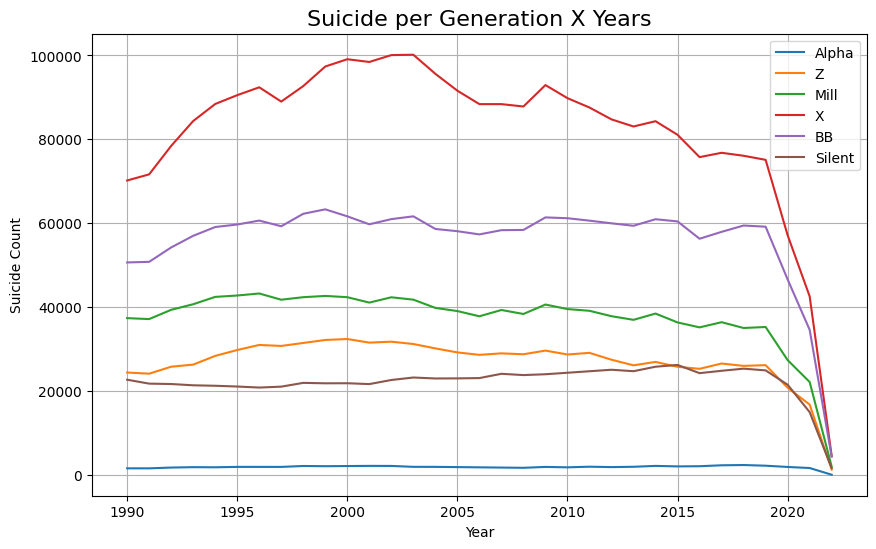

In [ ]:
suicide_generation.plot(x="Year", y=['Alpha', 'Z', 'Mill', 'X', 'BB', 'Silent'],
              kind="line", figsize=(10, 6))
plt.title("Suicide per Generation X Years", fontsize = 16, color = 'black')
plt.ylabel('Suicide Count', rotation=90, fontsize = 10)

plt.grid()
plt.show()

In [ ]:
df['SuicideRatePer100K'] = (df['SuicideCount'] / df['Population']) * 100000

In [ ]:
# Group the data by 'AgeGroup' and 'Sex', then calculate the suicide rate per 100K for each group
grouped_data = df.groupby(['AgeGroup', 'Sex']).agg({
    'SuicideCount': 'sum',
    'Population': 'sum'
}).reset_index()

grouped_data['SuicideRatePer100K'] = (grouped_data['SuicideCount'] / grouped_data['Population']) * 100000


In [ ]:
# Group the data by 'Generation' and 'Year', then calculate the suicide rate per 100K for each generation-year combination
generation_trends = df.groupby(['Generation', 'Year']).agg({
    'SuicideCount': 'sum',
    'Population': 'sum'
}).reset_index()

generation_trends['SuicideRatePer100K'] = (generation_trends['SuicideCount'] / generation_trends['Population']) * 100000


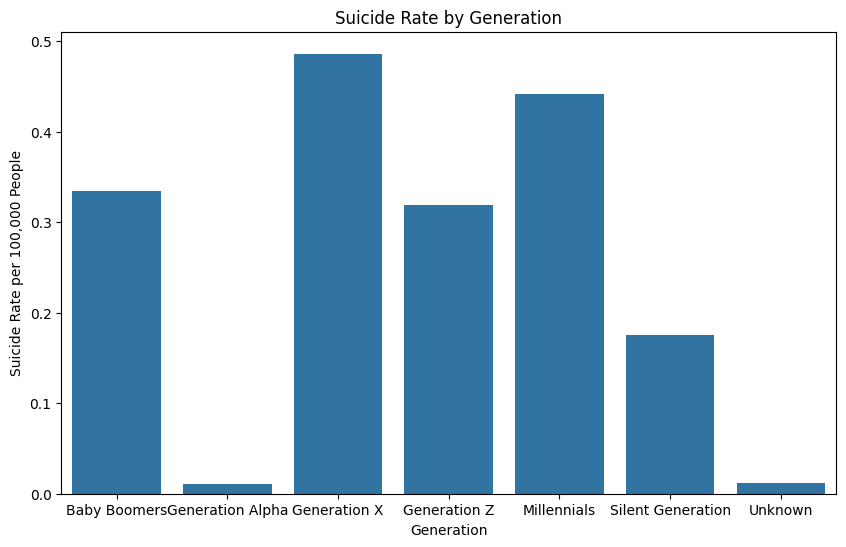

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Generation', y='SuicideRatePer100K', data=generation_trends, errorbar=None)

# Add title and labels
plt.title('Suicide Rate by Generation')
plt.xlabel('Generation')
plt.ylabel('Suicide Rate per 100,000 People')

# Show the plot
plt.show()

### Economic Impact Assessment

In [ ]:
df['GDPPerCapitaBucket'] = pd.qcut(df['GDPPerCapita'], 4, labels=["Low", "Medium", "High", "Very High"])

In [ ]:
pivot_gdp_year = df.pivot_table(index='Year', columns='GDPPerCapitaBucket', values='SuicideCount', aggfunc='sum')

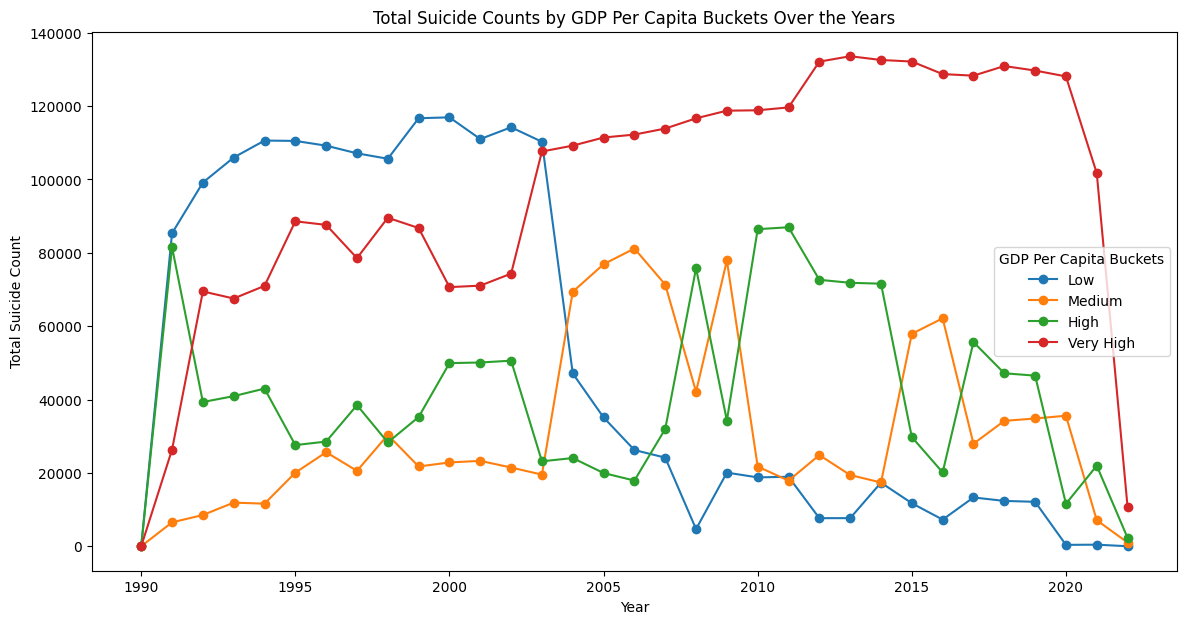

In [ ]:
pivot_gdp_year.plot(figsize=(14, 7), marker='o')
plt.title('Total Suicide Counts by GDP Per Capita Buckets Over the Years')
plt.ylabel('Total Suicide Count')
plt.xlabel('Year')
plt.legend(title='GDP Per Capita Buckets')
plt.show()

In [ ]:
categories, bins = pd.qcut(df['GDPPerCapita'], 4, labels=["Low", "Medium", "High", "Very High"], retbins=True)

print(categories, bins)


0               Low
1               Low
2               Low
3               Low
4               Low
            ...    
118555    Very High
118556    Very High
118557    Very High
118558    Very High
118559    Very High
Name: GDPPerCapita, Length: 118560, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High'] [6.02351205e+01 3.94159864e+03 9.70814135e+03 2.51972656e+04
 1.33711794e+05]


### Geographic Insights

In [ ]:
pivot_country_year = df.pivot_table(index='Year', columns='CountryName', values='SuicideCount', aggfunc='sum')

In [ ]:
top_countries = df.groupby('CountryName')['SuicideCount'].sum().nlargest(5).index.tolist()

In [ ]:
pivot_country_year = pivot_country_year[top_countries]

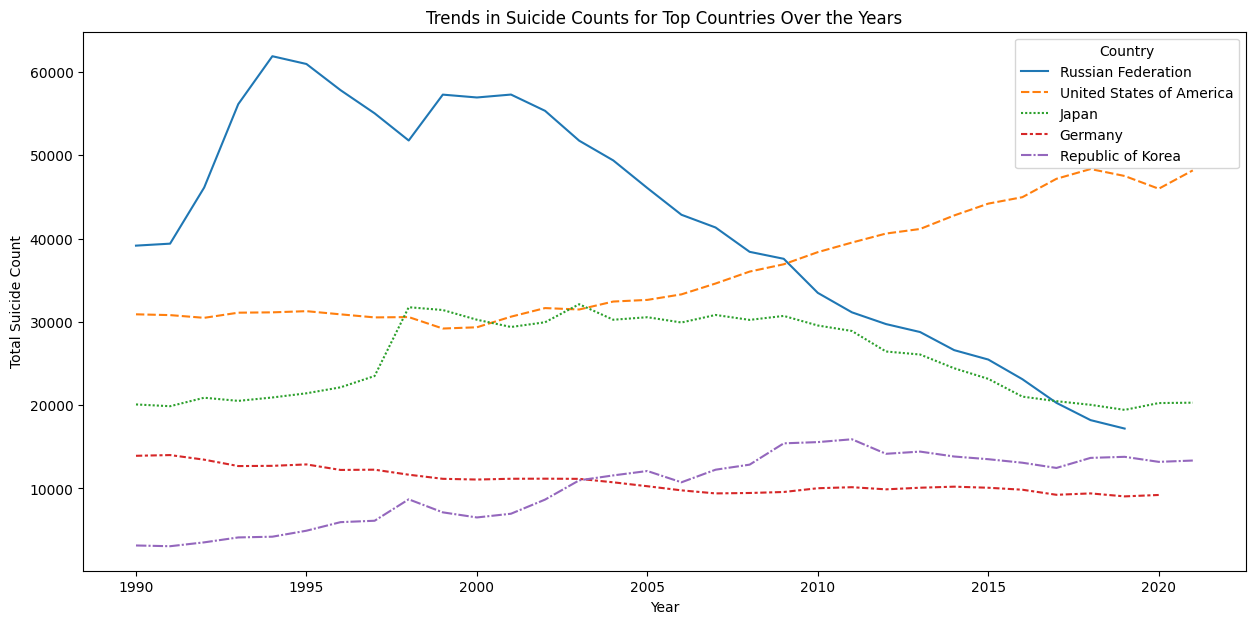

In [ ]:
plt.figure(figsize=(15, 7))

sns.lineplot(data=pivot_country_year)

plt.title('Trends in Suicide Counts for Top Countries Over the Years')
plt.ylabel('Total Suicide Count')
plt.xlabel('Year')
plt.legend(title='Country')
plt.show()

## Summary